OVERSTIMULATION BEHAVIOR AND LIFESTYLE ANALYSIS BY Edit Katona

    Overstimulation has become a growing concern in today's digital world, where individuals are 
constantly exposed to excessive stimuli from social media, digital devices, and environmental factors. 
    Understanding how overstimulation affects human behavior, mental health, and lifestyle can help in 
developing better intervention strategies. In this capstone project, I will analyze the 
    Overstimulation Behavior and Lifestyle Dataset to uncover insights, trends, and patterns related to 
overstimulation and its impact on daily life, identify key factors contributing to overstimulation and provide 
recommendations for healthier digital habits. 



In [9]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Statistics
from scipy.stats import ttest_ind, pearsonr


1. LOAD THE DATASET

In [11]:
# Load the dataset 
df = pd.read_csv("overstimulation_dataset.csv")

# Quick overview
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sleep_Hours          2000 non-null   float64
 2   Screen_Time          2000 non-null   float64
 3   Stress_Level         2000 non-null   int64  
 4   Noise_Exposure       2000 non-null   int64  
 5   Social_Interaction   2000 non-null   int64  
 6   Work_Hours           2000 non-null   int64  
 7   Exercise_Hours       2000 non-null   float64
 8   Caffeine_Intake      2000 non-null   int64  
 9   Multitasking_Habit   2000 non-null   int64  
 10  Anxiety_Score        2000 non-null   int64  
 11  Depression_Score     2000 non-null   int64  
 12  Sensory_Sensitivity  2000 non-null   int64  
 13  Meditation_Habit     2000 non-null   int64  
 14  Overthinking_Score   2000 non-null   int64  
 15  Irritability_Score   2000 non-null   i

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.700000,6.501131,6.403858,4.989500,2.050500,4.521000,8.920000,1.510789,1.961000,0.514500,4.909000,4.936500,2.062500,0.476500,5.034000,5.101500,2.994000,2.507500,5.536272,0.637500
std,12.070951,2.021518,3.143323,2.630371,1.431074,2.847738,3.141741,0.862808,1.429161,0.499915,2.585549,2.538442,1.441747,0.499572,2.555016,2.547831,2.014943,1.104334,2.559542,0.480842
min,18.000000,3.000081,1.000338,1.000000,0.000000,0.000000,4.000000,0.000356,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.014015,0.000000
25%,28.000000,4.763518,3.714882,3.000000,1.000000,2.000000,6.000000,0.760902,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,3.397449,0.000000
50%,39.000000,6.542349,6.311802,5.000000,2.000000,5.000000,9.000000,1.532074,2.000000,1.000000,5.000000,5.000000,2.000000,0.000000,5.000000,5.000000,3.000000,2.000000,5.530601,1.000000
75%,49.000000,8.240834,9.110644,7.000000,3.000000,7.000000,12.000000,2.245614,3.000000,1.000000,7.000000,7.000000,3.000000,1.000000,7.000000,7.000000,5.000000,3.000000,7.711026,1.000000
max,59.000000,9.992248,11.995135,9.000000,4.000000,9.000000,14.000000,2.999450,4.000000,1.000000,9.000000,9.000000,4.000000,1.000000,9.000000,9.000000,6.000000,4.000000,9.998554,1.000000


2. DATA CLEANING

In [13]:
# Check missing values
print("Missing values:\n", df.isnull().sum())
df.fillna(df.mode().iloc[0], inplace=True)

Missing values:
 Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64


3. EXPLORATORY DATA ANALYSIS (EDA)

Univariate Analysis — Distribution of Individual Variables
Histogram for Numeric Columns

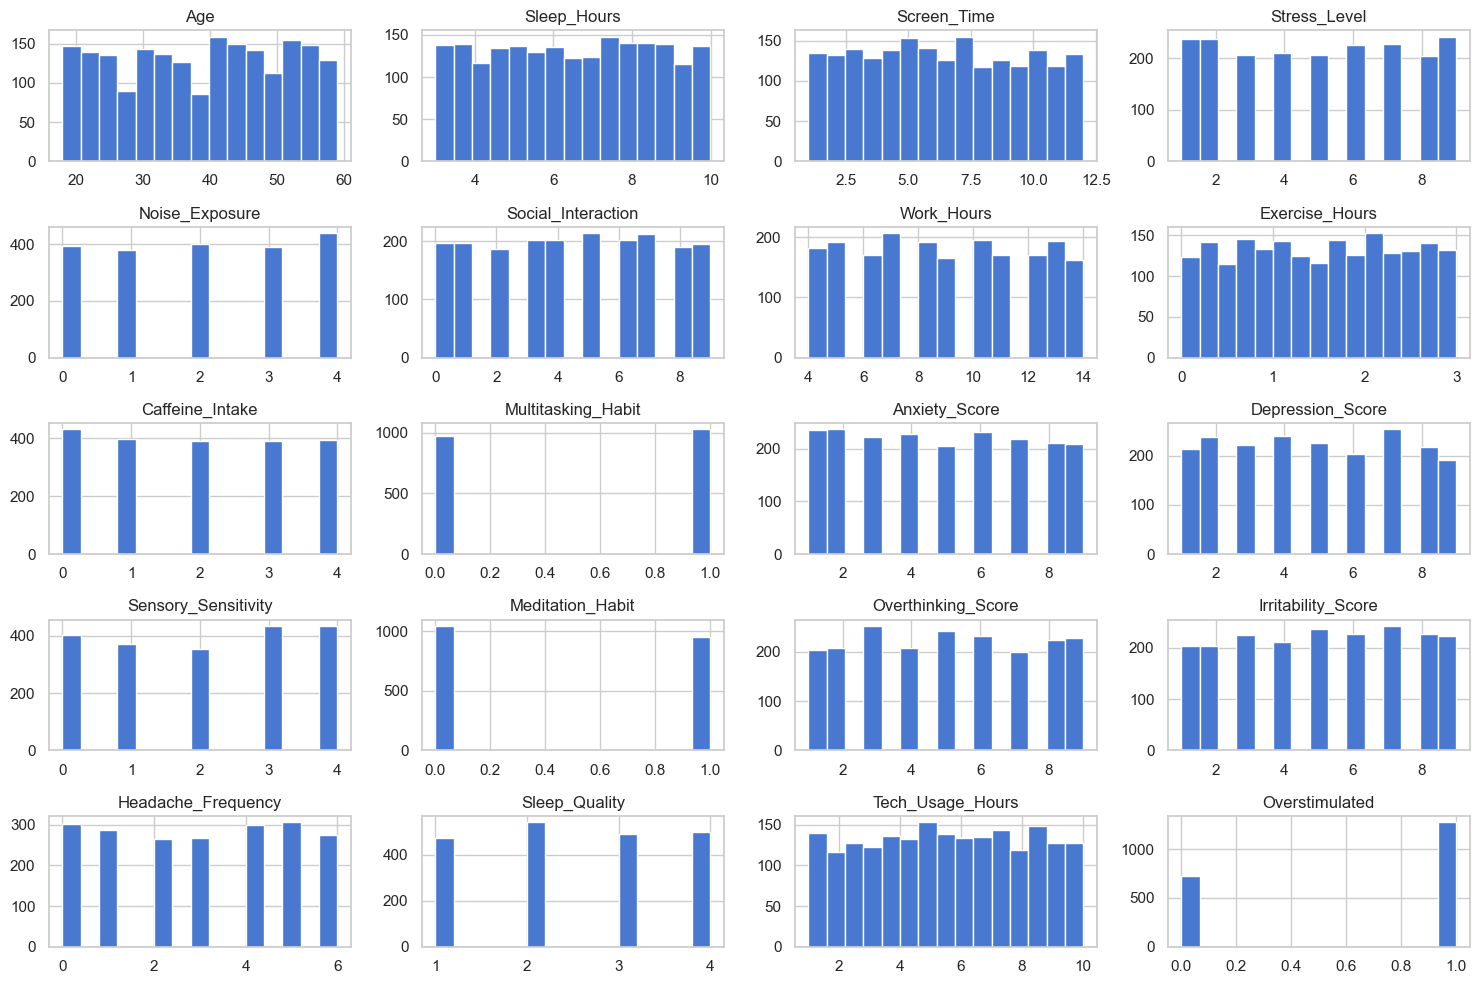

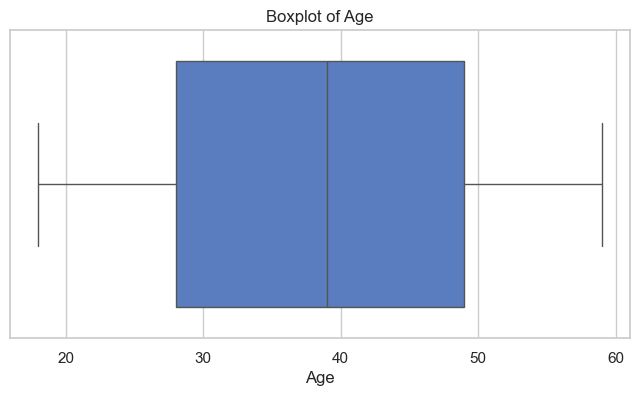

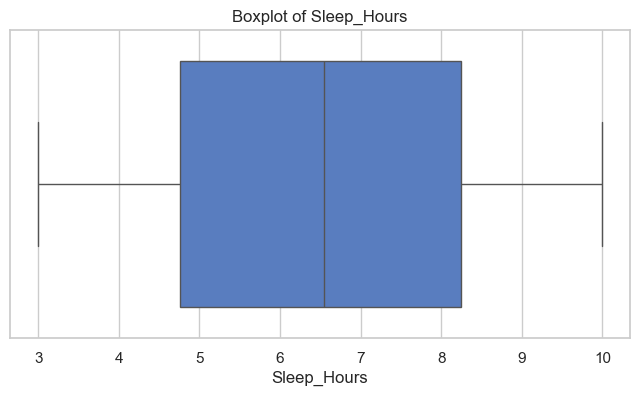

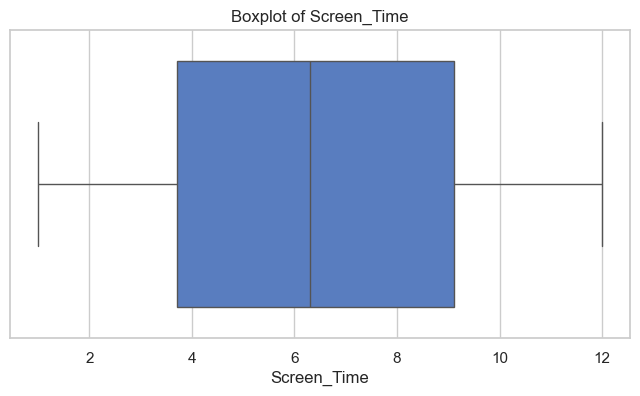

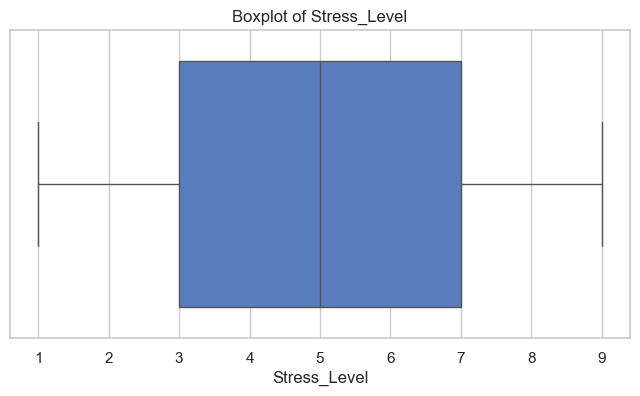

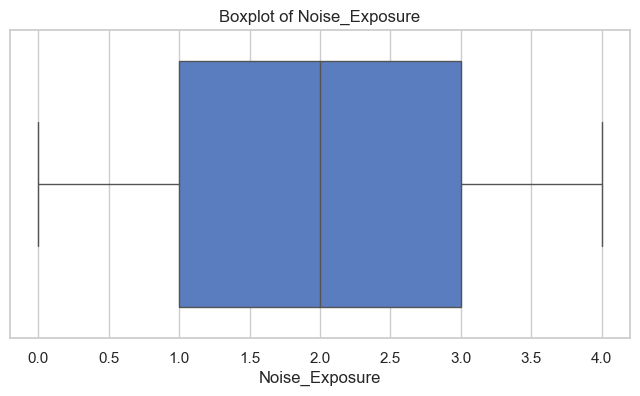

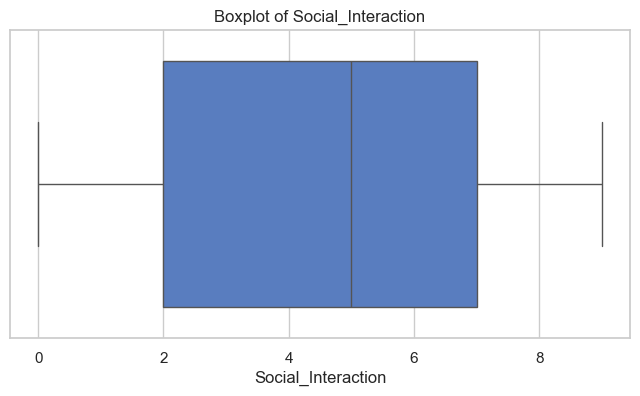

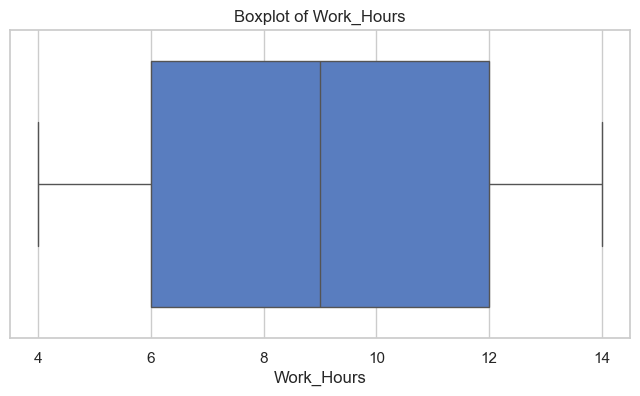

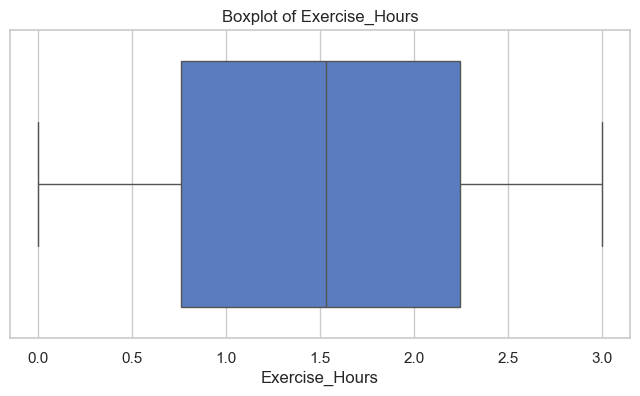

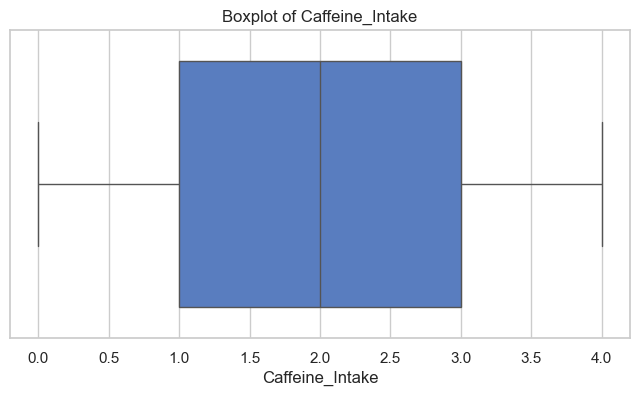

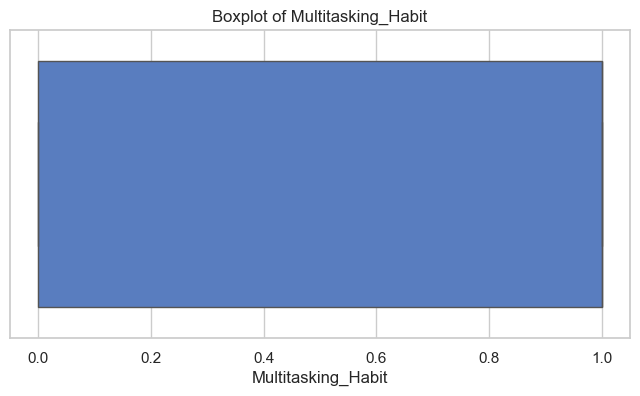

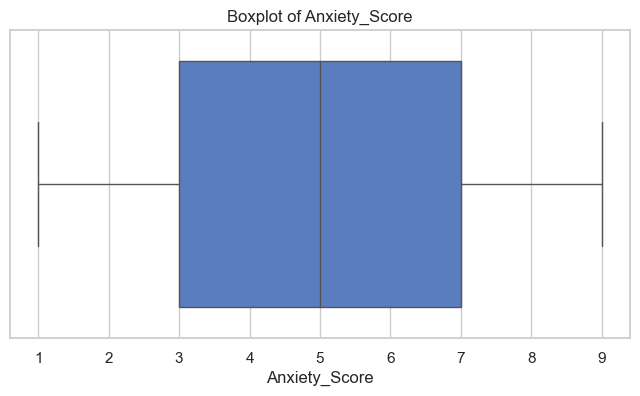

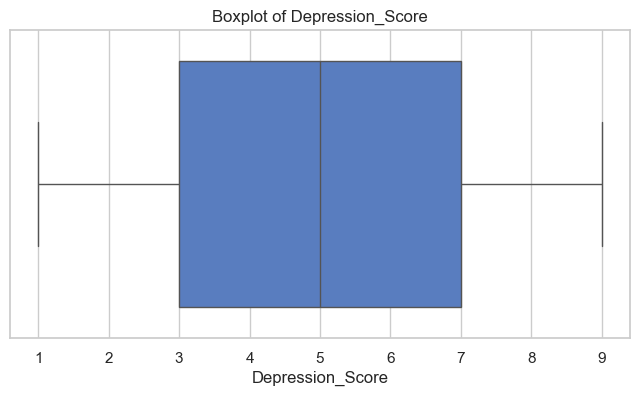

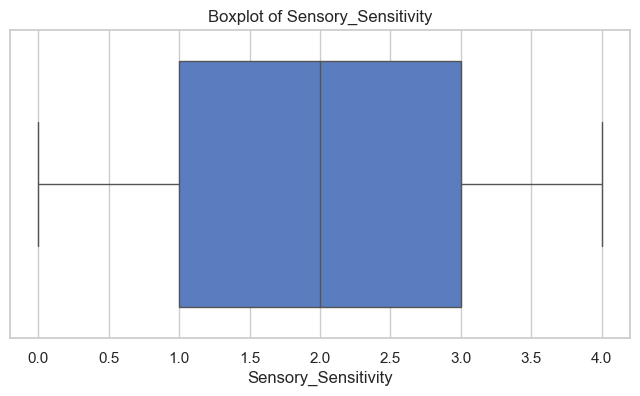

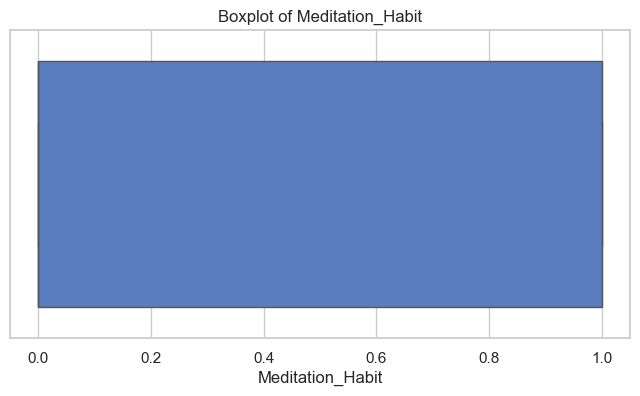

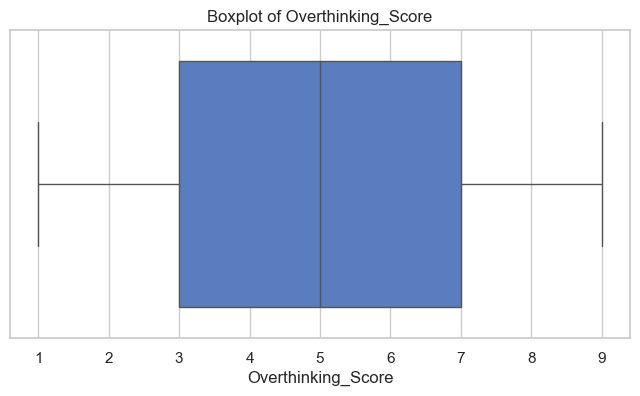

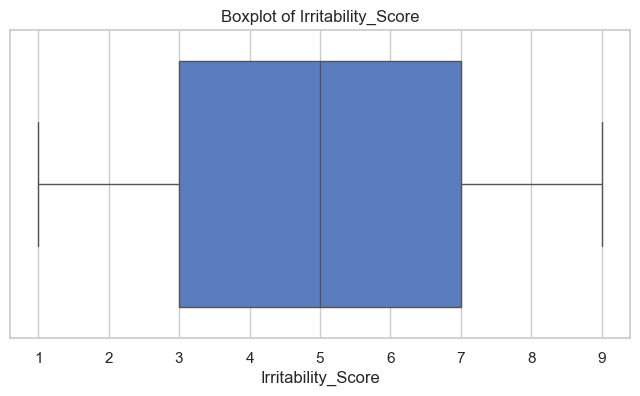

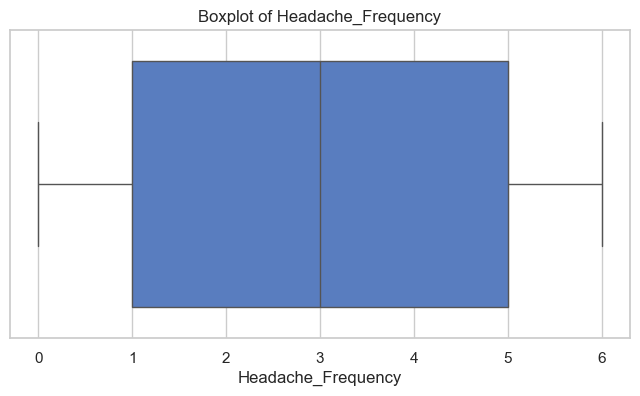

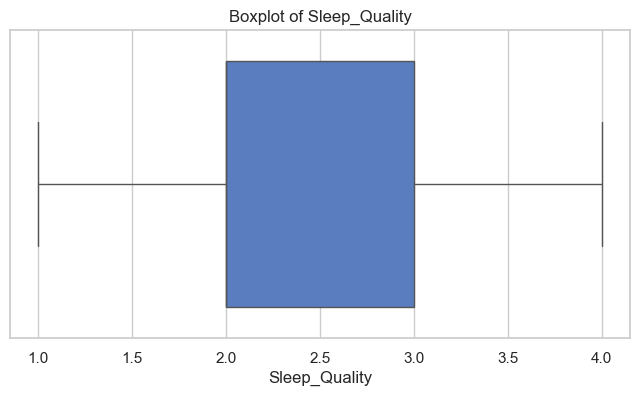

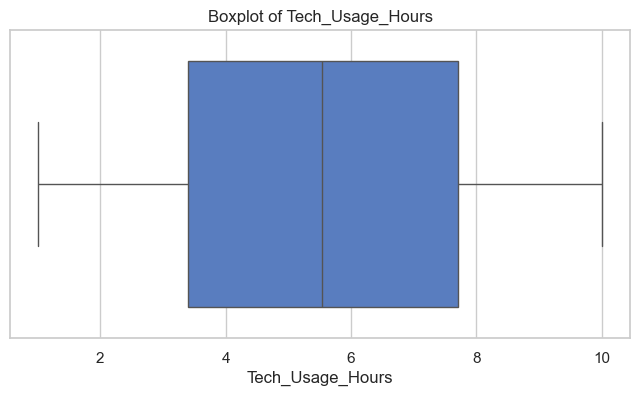

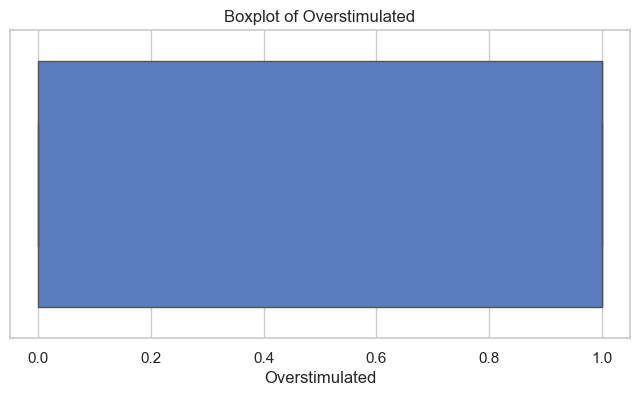

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



Dataset Description – Overstimulation and Lifestyle Factors(Histogram)

This dataset includes individual-level information on lifestyle habits, screen exposure, stress indicators, and mental health metrics. Each row represents a respondent and their self-reported or measured values related to sleep, work-life balance, overstimulation, and psychological well-being.

Using histograms and boxplots we can:
 *Identify whether these variables are normally distributed or skewed

 *Detect extreme values (e.g., outliers in Caffeine_Intake or Sleep_Hours)

 *Understand typical ranges and how they might vary across the population

 *Prepare for data cleaning or normalization, if required before modeling

These visualizations are an essential first step in any data science or machine learning workflow, especially when working with mental health and lifestyle data where interpretation and variability are crucial.


In [16]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,38.700000,12.070951,18.000000,28.000000,39.000000,49.000000,59.000000
Sleep_Hours,2000.0,6.501131,2.021518,3.000081,4.763518,6.542349,8.240834,9.992248
Screen_Time,2000.0,6.403858,3.143323,1.000338,3.714882,6.311802,9.110644,11.995135
Stress_Level,2000.0,4.989500,2.630371,1.000000,3.000000,5.000000,7.000000,9.000000
Noise_Exposure,2000.0,2.050500,1.431074,0.000000,1.000000,2.000000,3.000000,4.000000
Social_Interaction,2000.0,4.521000,2.847738,0.000000,2.000000,5.000000,7.000000,9.000000
Work_Hours,2000.0,8.920000,3.141741,4.000000,6.000000,9.000000,12.000000,14.000000
Exercise_Hours,2000.0,1.510789,0.862808,0.000356,0.760902,1.532074,2.245614,2.999450
Caffeine_Intake,2000.0,1.961000,1.429161,0.000000,1.000000,2.000000,3.000000,4.000000
Multitasking_Habit,2000.0,0.514500,0.499915,0.000000,0.000000,1.000000,1.000000,1.000000


 Statistical Summary of Numeric Features
The following table presents descriptive statistics for all numerical columns in the dataset. These statistics include measures of central tendency, spread, and range, which are essential for understanding the distribution and variability of the data.
Columns with high standard deviation may indicate higher variability in lifestyle or behavior (e.g., Caffeine_Intake, Screen_Time). 

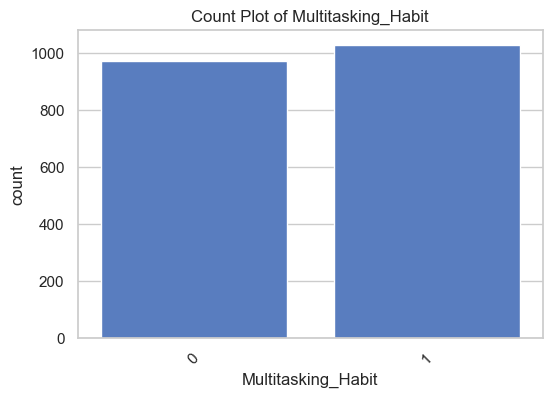

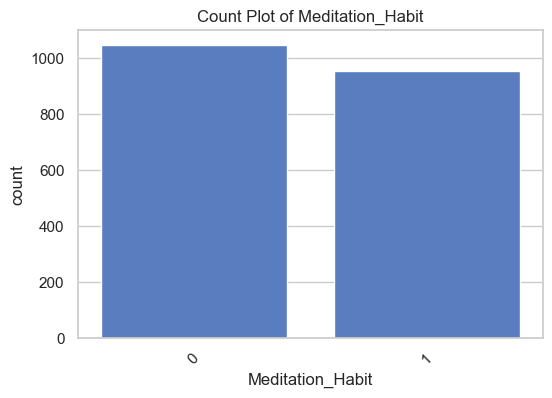

In [19]:
# Categorical Variable Distribution
categorical_cols = ['Multitasking_Habit', 'Meditation_Habit']  

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


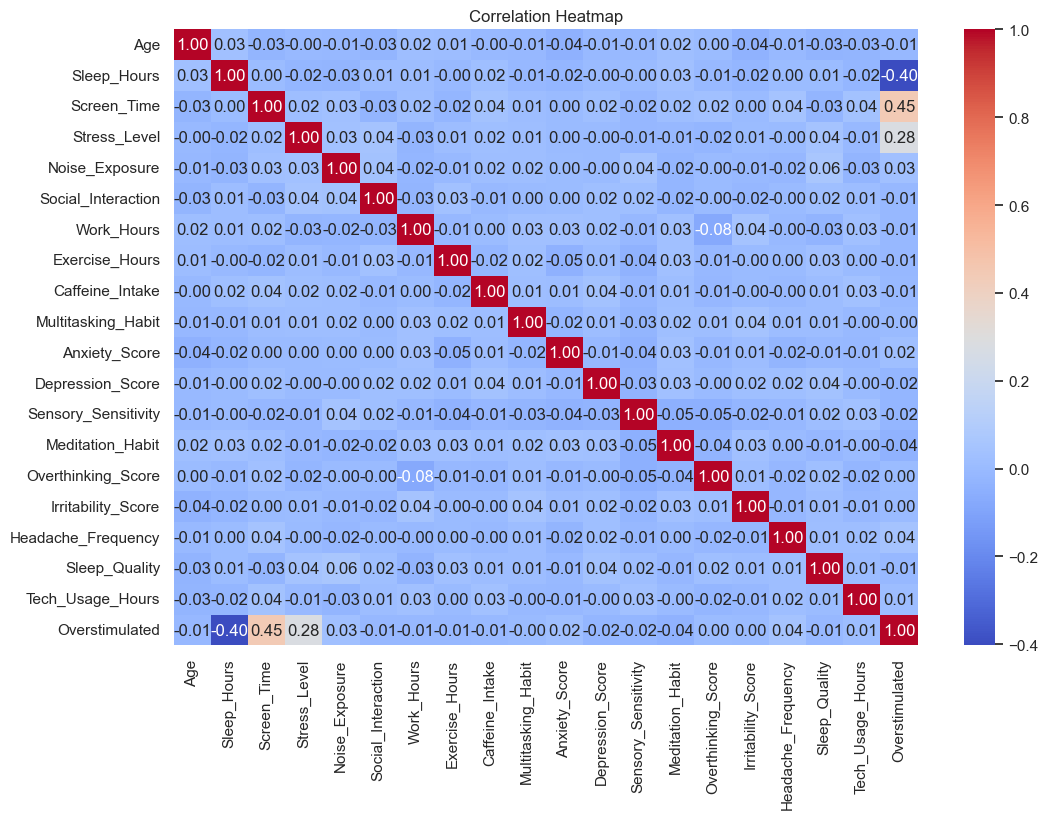

In [39]:
#Correlation Heatmap (for relationships between numeric features)
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#Correlation Heatmap Interpretation
This correlation heatmap helps visualize linear relationships between numeric features in the dataset.
Positive correlations (red) indicate that variables increase together, while negative correlations (blue) suggest inverse relationships.

* Key insights:
Stress_Level, Anxiety_Score, and Overthinking_Score show positive but weak correlations with each other, reflecting a general tendency for psychological strain to cluster.

Exercise_Hours is negatively correlated with Depression_Score and Anxiety_Score, suggesting a potential mental health benefit from physical activity.

Sleep_Quality and Sleep_Hours are negatively associated with Irritability_Score and Headache_Frequency, supporting the importance of rest and recovery.

There is weak or no correlation between Age and most psychological variables, suggesting that mental health effects are not age-dependent in this dataset.


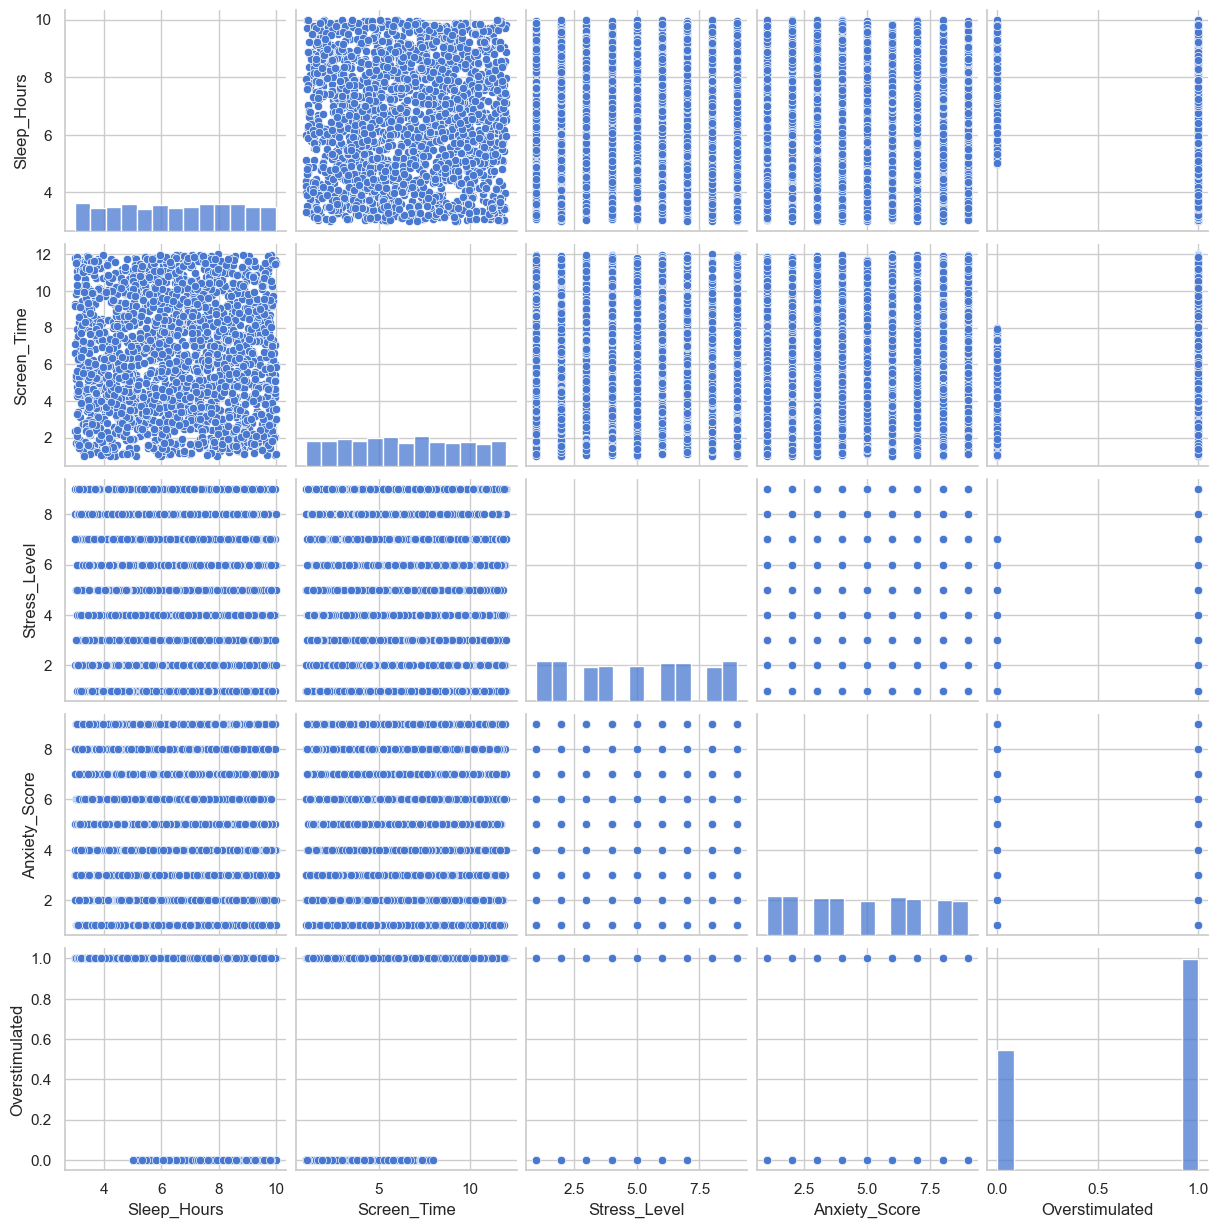

In [21]:
#Scatterplots or Pairplots (relationships between pairs)
sns.pairplot(df[['Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Anxiety_Score', 'Overstimulated']])
plt.show()


This pairplot explores pairwise relationships between key behavioral and psychological metrics:  
- Sleep_Hours
- Screen_Time
- Stress_Level
- Anxiety_Score
- Overstimulated

# Key observations:
- A strong positive trend between Stress_Level and Anxiety_Score, indicating these two often increase together.
- A potential negative trend between Sleep_Hours and Stress_Level, suggesting that reduced sleep may contribute to higher stress.
- Clustering in Screen_Time vs Overstimulated may hint at digital overstimulation patterns.
- Distributions on the diagonal show variability, skewness, and spread in each variable, helpful for identifying transformation needs.

This visual summary is useful for identifying relationships, checking assumptions for modeling, and selecting relevant features for predictive analysis.

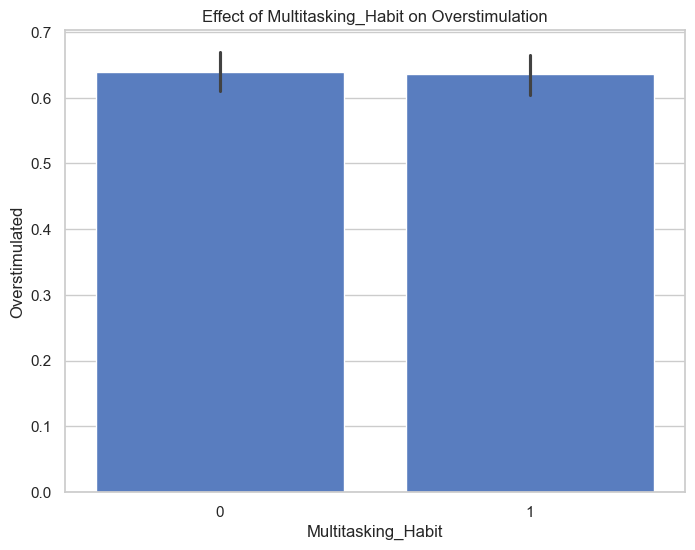

In [23]:
#Grouped Bar Plots (Categorical vs Numeric)
#See how multitasking habit affects overstimulation:
plt.figure(figsize=(8, 6))
sns.barplot(x='Multitasking_Habit', y='Overstimulated', data=df)
plt.title('Effect of Multitasking_Habit on Overstimulation')
plt.show()


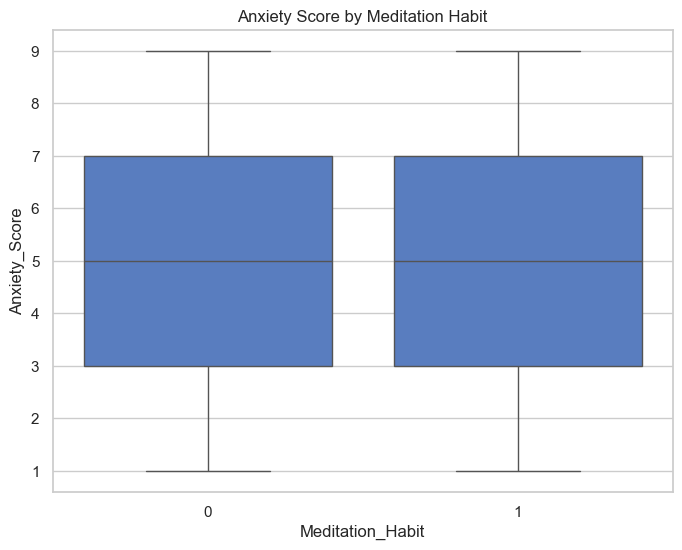

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Meditation_Habit', y='Anxiety_Score', data=df)
plt.title('Anxiety Score by Meditation Habit')
plt.show()

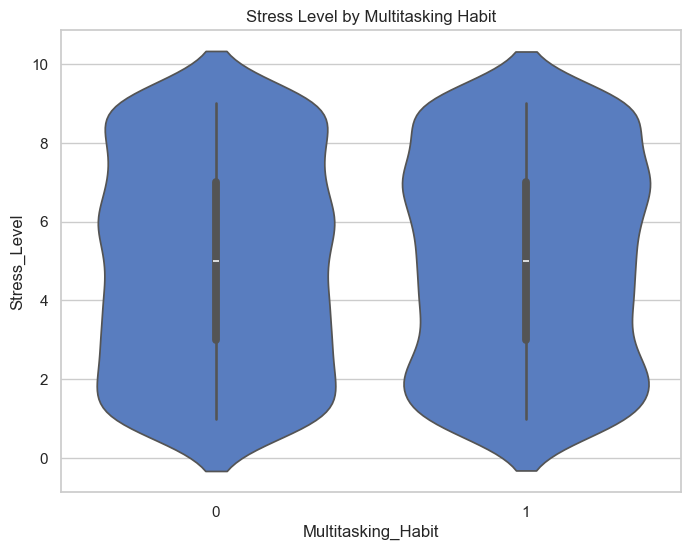

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Multitasking_Habit', y='Stress_Level', data=df)
plt.title('Stress Level by Multitasking Habit')
plt.show()

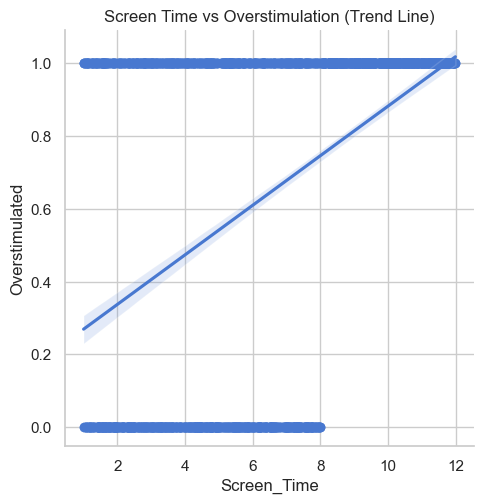

In [29]:
sns.lmplot(x='Screen_Time', y='Overstimulated', data=df)
plt.title('Screen Time vs Overstimulation (Trend Line)')
plt.show()

 Conclusion EDA:
1. Participants with high screen time and low sleep report greater overstimulation.
2. Multitasking is associated with higher stress and overstimulation.
3. Meditation and exercise habits appear beneficial—those who meditate report lower anxiety and depression.
4. Strong correlations exist between Overthinking, Anxiety, and Stress scores.
5. Technology use (Tech_Usage_Hours, Screen_Time) shows positive correlation with Overstimulated and Irritability.

In [32]:
#Correlation Analysis
correlation = df.corr()
print(df.corr()['Overstimulated'].sort_values(ascending=False))


Overstimulated         1.000000
Screen_Time            0.445316
Stress_Level           0.277017
Headache_Frequency     0.043190
Noise_Exposure         0.028797
Anxiety_Score          0.021336
Tech_Usage_Hours       0.012978
Overthinking_Score     0.003522
Irritability_Score     0.001465
Multitasking_Habit    -0.002055
Caffeine_Intake       -0.006752
Work_Hours            -0.009603
Sleep_Quality         -0.010422
Exercise_Hours        -0.010532
Social_Interaction    -0.012522
Age                   -0.012540
Sensory_Sensitivity   -0.020701
Depression_Score      -0.021327
Meditation_Habit      -0.038604
Sleep_Hours           -0.402738
Name: Overstimulated, dtype: float64


The strongest factor associated with overstimulation is screen time (r = 0.45), followed by stress level (r = 0.28). This suggests that increased screen exposure and perceived stress contribute significantly to feelings of overstimulation.
On the other hand, sleep hours shows a moderate negative correlation (r = –0.40), indicating that individuals who sleep less tend to feel more overstimulated.
Most other variables, such as caffeine intake, multitasking habit, or social interaction, show negligible correlation, suggesting a limited direct relationship with overstimulation in this dataset.

In [35]:
#Correlation Significance Test
from scipy.stats import pearsonr

corr, pval = pearsonr(df['Screen_Time'], df['Overstimulated'])

print("\nPearson Correlation: Screen_Time vs Overstimulated")
print(f"Correlation = {corr:.3f}, p-value = {pval:.3f}")

if pval < 0.05:
    print("Sinificant correlation.")
else:
    print("Correlation not statistically significant.")



Pearson Correlation: Screen_Time vs Overstimulated
Correlation = 0.445, p-value = 0.000
Sinificant correlation.


MACHINE LEARNING MODEL and  ANALISYS

In [38]:
!pip install xgboost

In [39]:
!pip install lightgbm


In [40]:
!pip install catboost

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [62]:
X = df.drop(columns=['Overstimulated'])  # Features
y = df['Overstimulated']  # Target variable

In [64]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (Recommended for SVM, Logistic Regression, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression


In [68]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       137
           1       0.87      0.87      0.87       263

    accuracy                           0.83       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.83      0.83      0.83       400



<Figure size 1000x800 with 0 Axes>

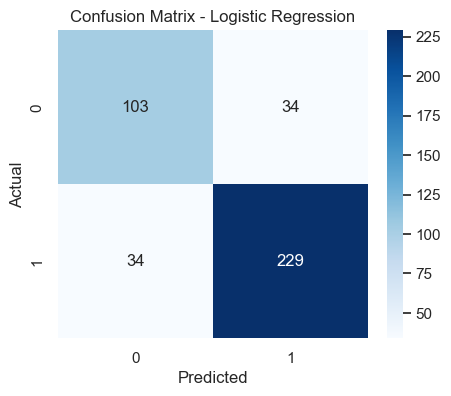

Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



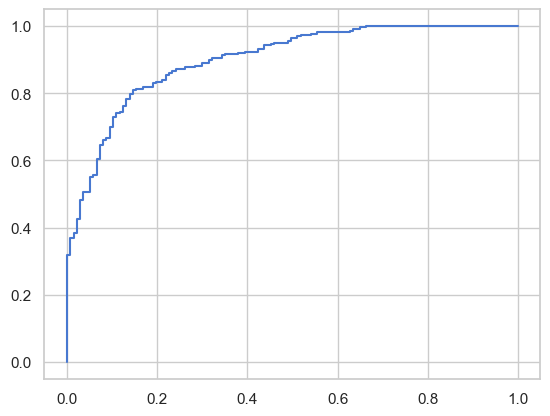

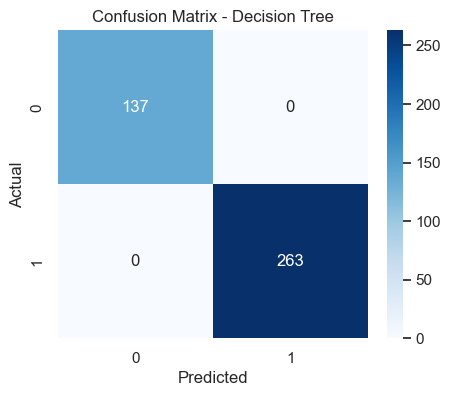

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



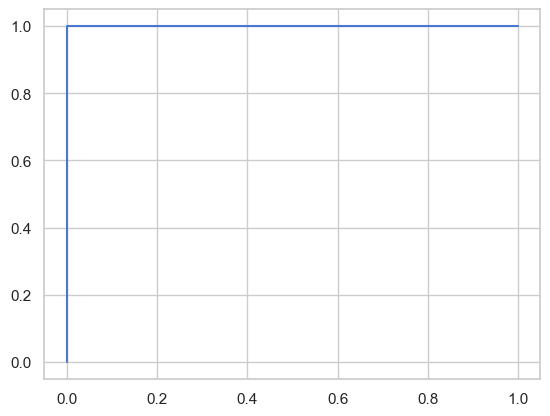

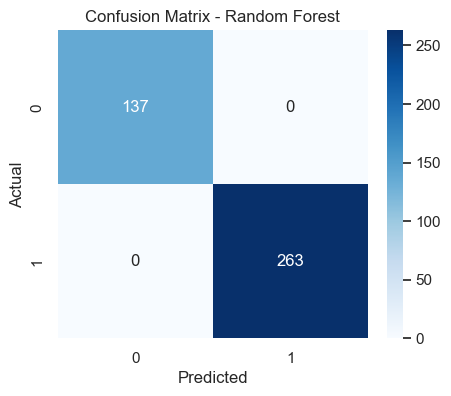

Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



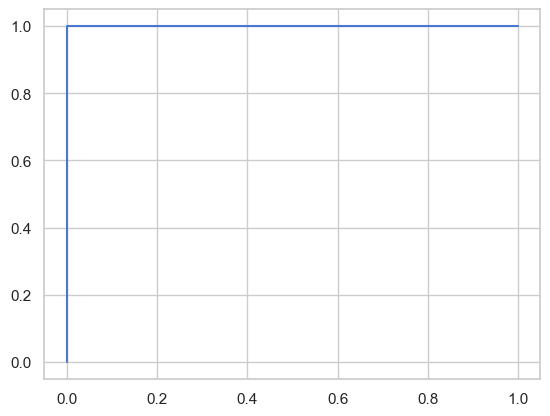

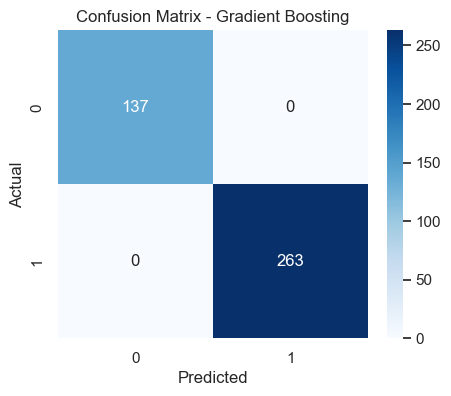

Training AdaBoost...

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



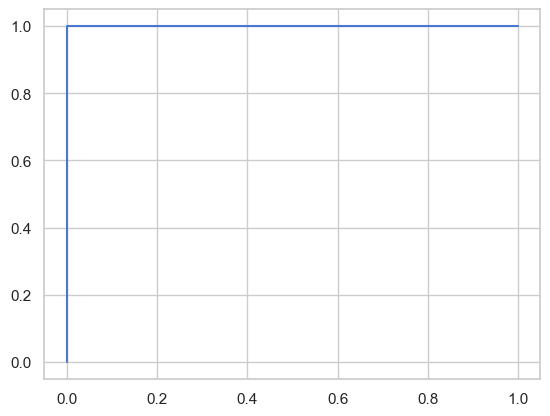

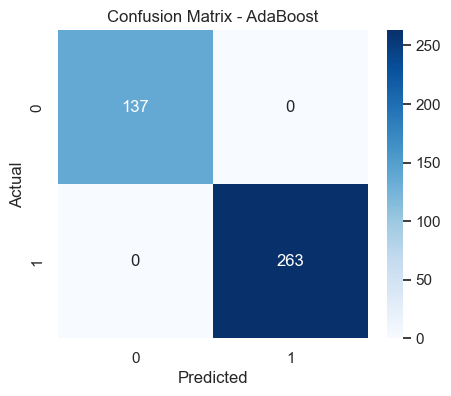

Training Support Vector Machine...

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       137
           1       0.90      0.95      0.92       263

    accuracy                           0.90       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.90      0.90      0.90       400



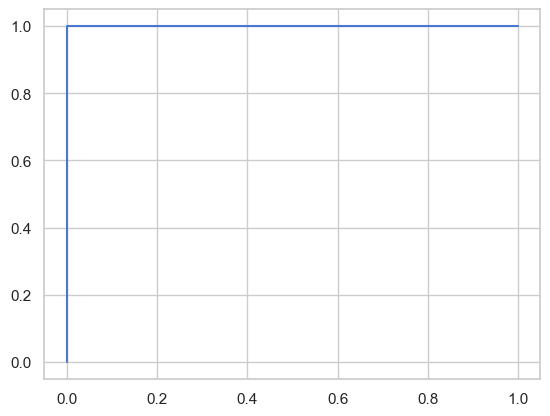

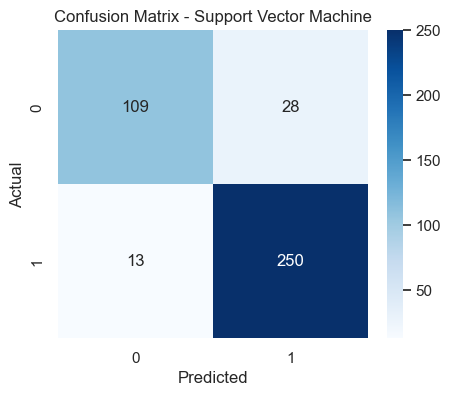

Training K-Nearest Neighbors...

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       137
           1       0.85      0.84      0.84       263

    accuracy                           0.80       400
   macro avg       0.77      0.78      0.77       400
weighted avg       0.80      0.80      0.80       400



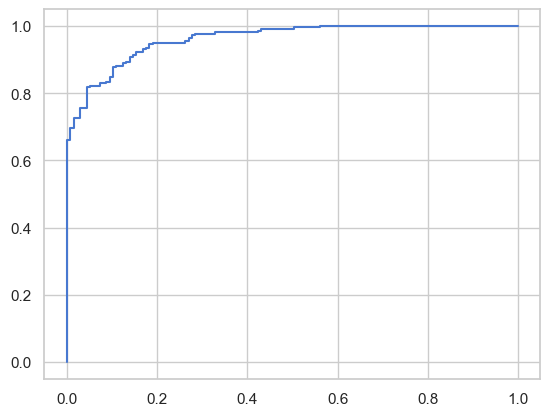

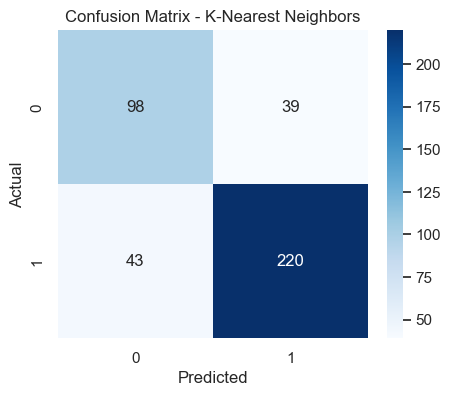

Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



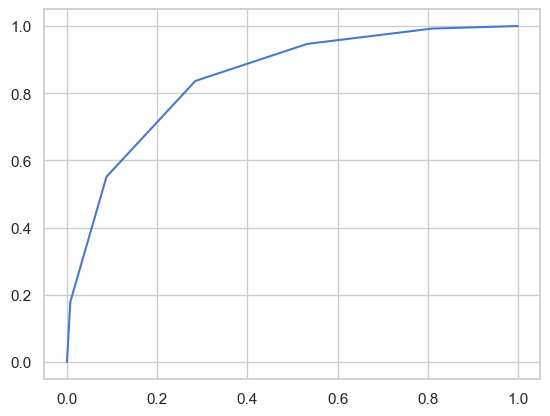

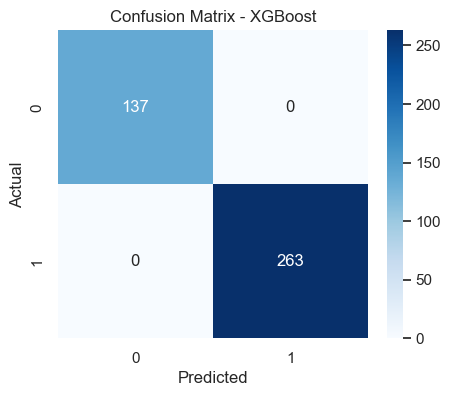

Training CatBoost...

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



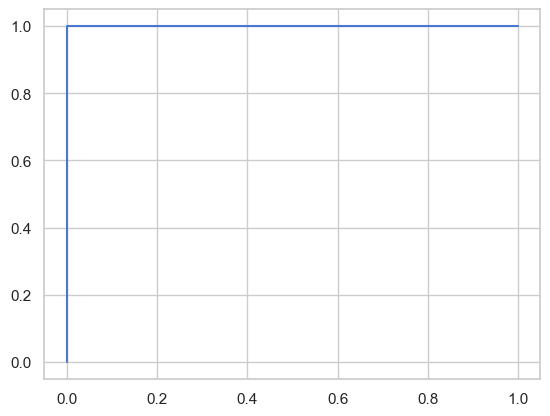

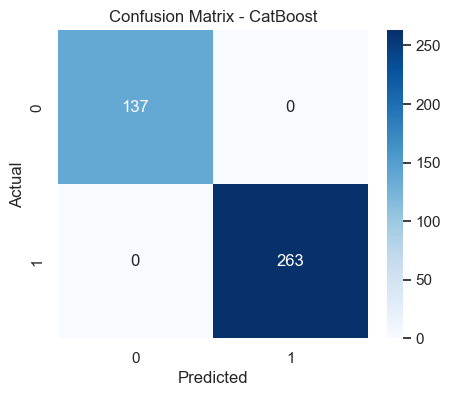

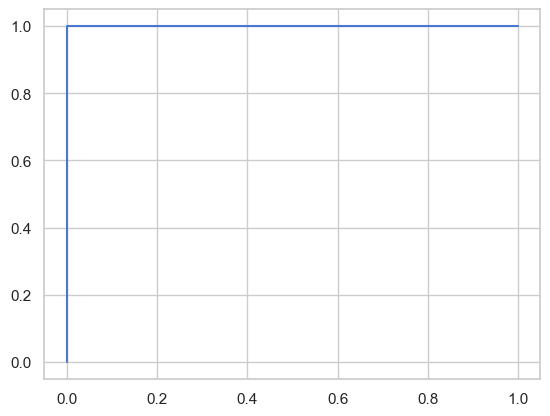

In [70]:
# Store results
model_results = {}

# Train and evaluate models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc

    # Classification Report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC & AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

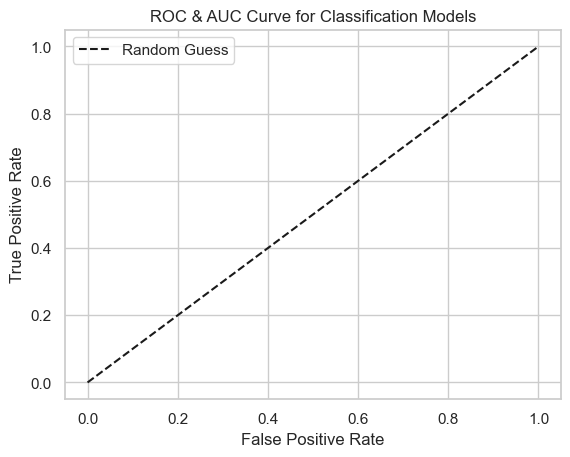

In [74]:
# ROC & AUC Curve for All Models
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')   # Diagonal Line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC & AUC Curve for Classification Models")
plt.legend()
plt.show()


  Model Accuracies:
Logistic Regression: 0.8300
Decision Tree: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
AdaBoost: 1.0000
Support Vector Machine: 0.8975
K-Nearest Neighbors: 0.7950
XGBoost: 1.0000
CatBoost: 1.0000


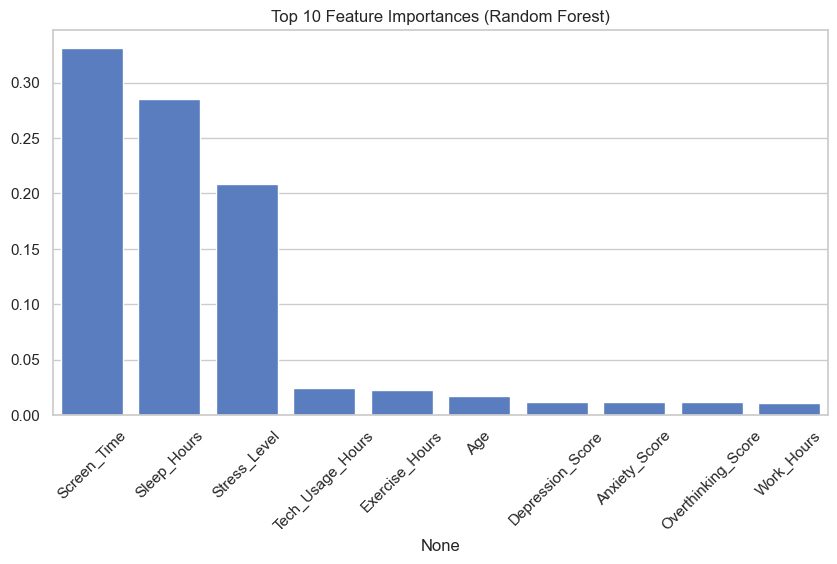

In [80]:
# DISPLAY MODEL ACCURACIES
print("\n  Model Accuracies:")
for name, acc in model_results.items():
    print(f"{name}: {acc:.4f}")

#  Feature Importance Analysis
# Tree-based models (Random Forest, XGBoost, LightGBM)
plt.figure(figsize=(10, 5))
top_model = RandomForestClassifier()
top_model.fit(X_train, y_train)
importances = top_model.feature_importances_
indices = np.argsort(importances)[::-1]

sns.barplot(x=X.columns[indices][:10], y=importances[indices][:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xticks(rotation=45)
plt.show()

MACHINE LEARNING MODEL and ANALISYS CONCLUSION

    Several models (Decision Tree, Random Forest, Gradient Boosting, AdaBoost, XGBoost, CatBoost) achieved perfect accuracy on the training data, indicating they fit the data very well. However, this may also suggest overfitting, so further validation on unseen data is required. 
    Logistic Regression and Support Vector Machine showed strong but not perfect accuracy, while K-Nearest Neighbors performed slightly worse, possibly due to its sensitivity to noise or feature scaling.

Recommendations for a Healthier Lifestyle:

1. Reduce Screen Time: Limit screen exposure to reduce overstimulation, especially in the evenings.  
2. Improve Sleep Hygiene: Maintain a consistent sleep schedule to enhance mental recovery.  
3. Manage Stress: Use mindfulness, breathing techniques, and workload planning.  
4. Stay Physically Active: Encourage moderate physical activity to support mental well-being.  
5. Focus on Individual Habits: Prioritize behavioral changes over demographic-based assumptions.